In [1]:
import pandas as pd

news_df = pd.read_csv('./news/news_cluster.csv')
news_df['time'] = pd.to_datetime(news_df['created_at'], unit='s')
news_df = news_df[news_df['time'] >= '2023-03-01']
reddit_df = pd.read_csv('./mining/reddit_clean.csv')
reddit_df['time'] = pd.to_datetime(reddit_df['created_utc'], unit='s')
reddit_df = reddit_df[reddit_df['time'] >= '2023-03-01']

In [2]:
news_daily_counts = news_df.groupby(news_df['time'].dt.date).size()

In [3]:
reddit_daily_counts = reddit_df.groupby(reddit_df['time'].dt.date).size()

In [10]:
news_daily_counts_max = news_daily_counts.max()
news_daily_counts_min = news_daily_counts.min()
normalized_news_daily_counts = (news_daily_counts - news_daily_counts_min) / (news_daily_counts_max - news_daily_counts_min)

reddit_daily_counts_max = reddit_daily_counts.max()
reddit_daily_counts_min = reddit_daily_counts.min()
# normalized_reddit_daily_counts = (reddit_daily_counts - reddit_daily_counts_min) / (reddit_daily_counts_max - reddit_daily_counts_min)
normalized_reddit_daily_counts = reddit_daily_counts

In [5]:
normalized_news_daily_counts

time
2023-03-06    0.0
2023-03-10    0.2
2023-03-21    0.0
2023-03-24    0.0
2023-03-27    0.0
             ... 
2023-09-05    0.6
2023-09-07    0.4
2023-09-08    0.6
2023-09-10    0.0
2023-09-12    0.0
Length: 101, dtype: float64

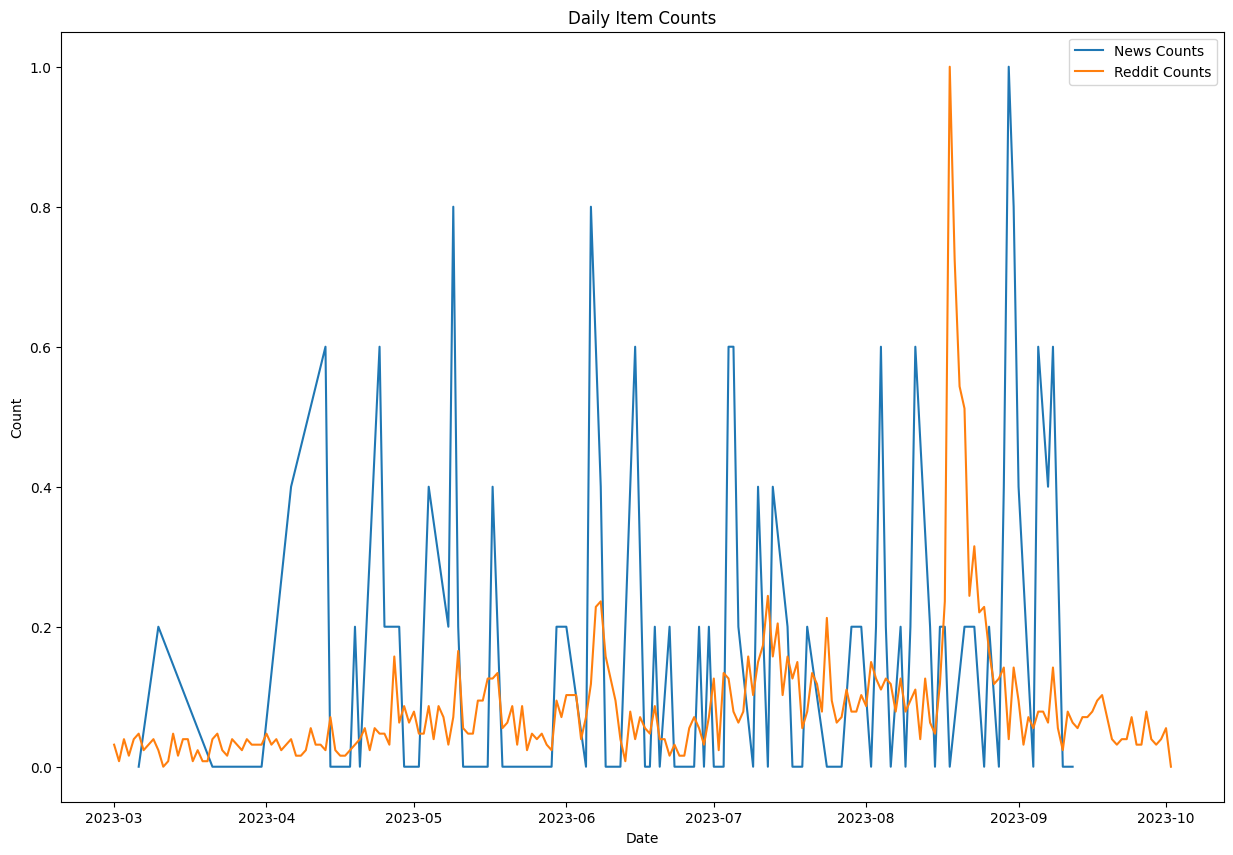

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

normalized_news_daily_counts.plot(ax=ax, label='News Counts')
normalized_reddit_daily_counts.plot(ax=ax, label='Reddit Counts')

ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Daily Item Counts')
ax.legend()

plt.show()

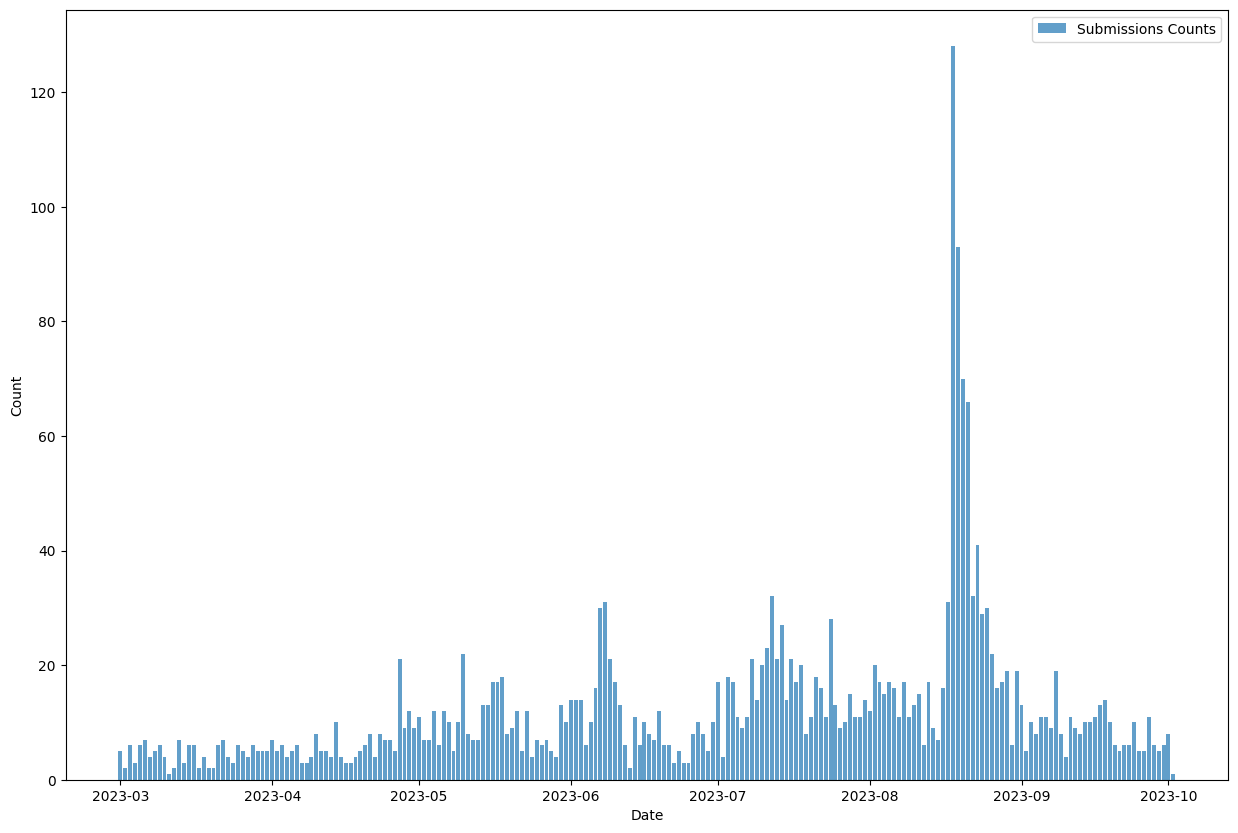

0
Area restriction for the Jubilee Mountain wildfire rescinded


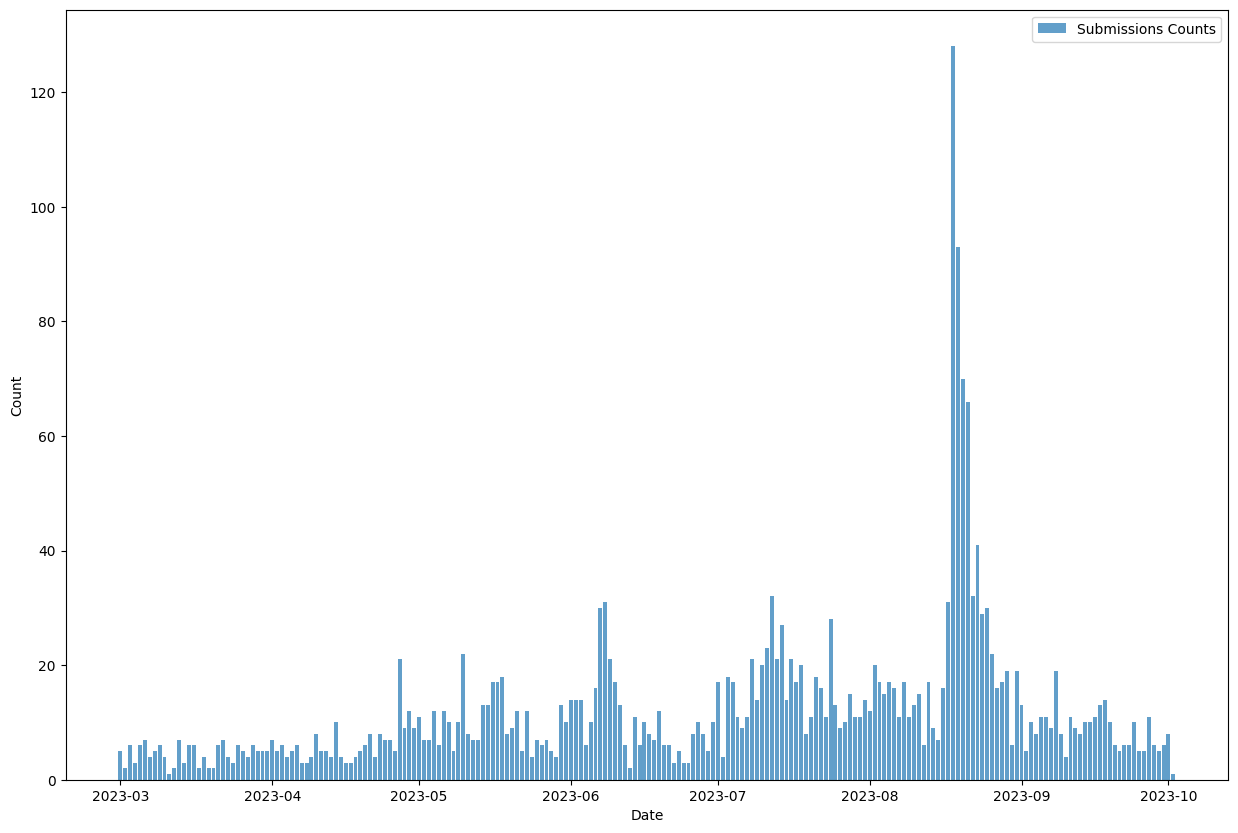

1
Campfire Prohibition Partially Rescinded in Northwest Fire Centre


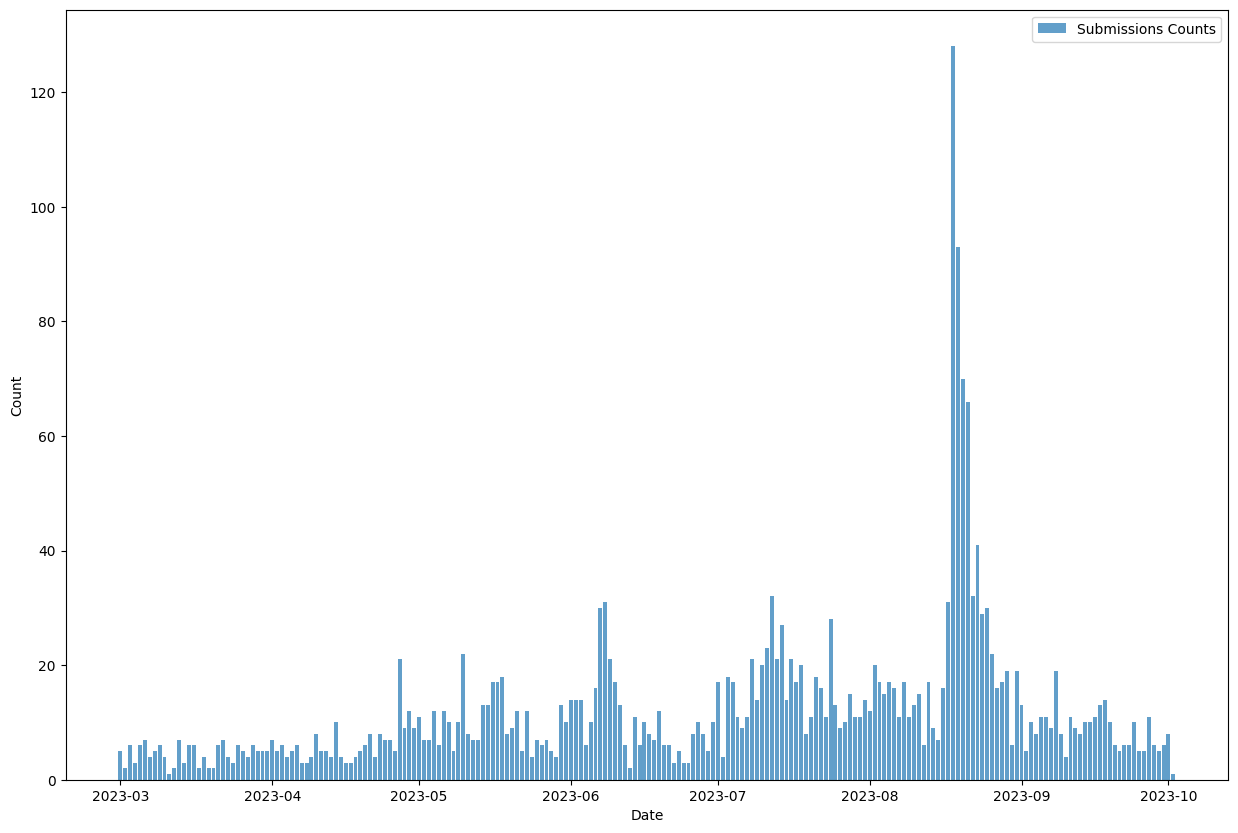

2
Regional wildfire update for the Northwest Fire Centre and Prince George Fire Centre


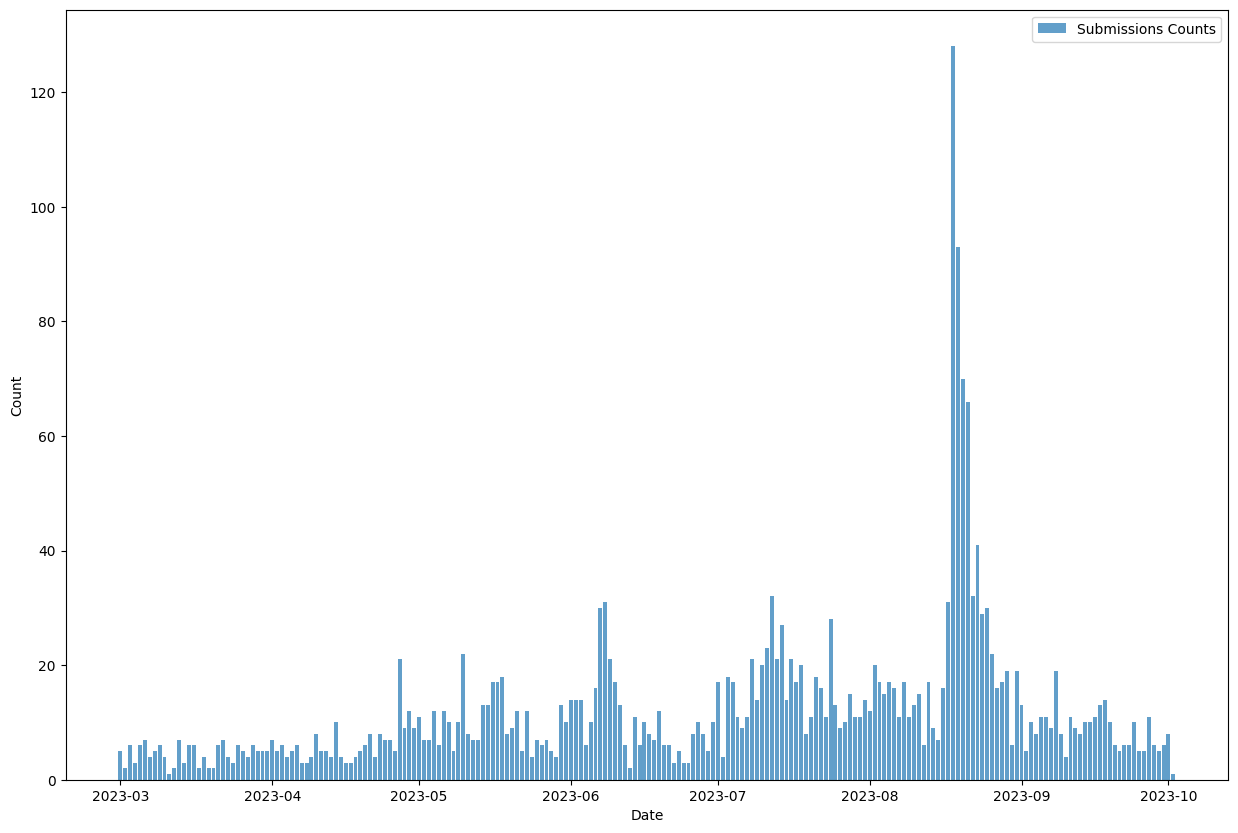

3
Forecasted weather conditions expected to increase fire activity


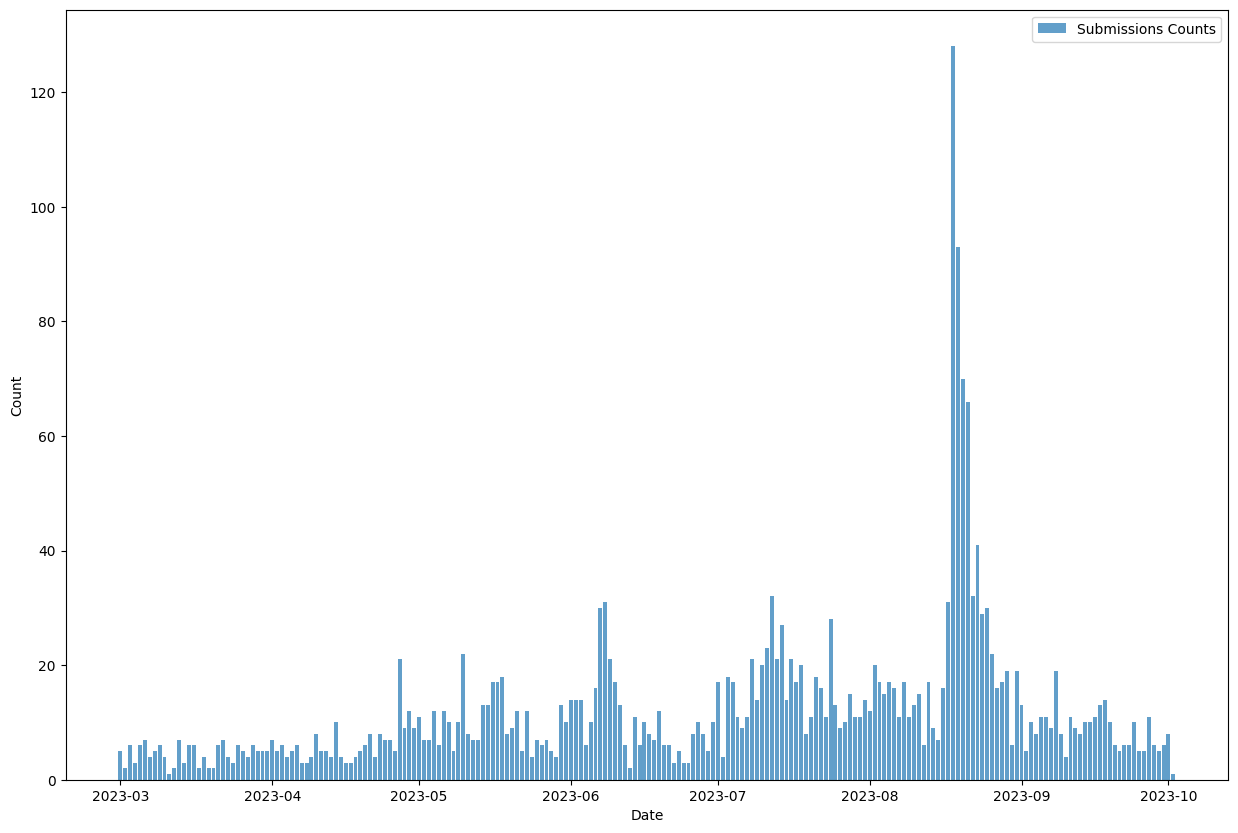

4
Provincial Wildfire Status Update – September 7, 2023


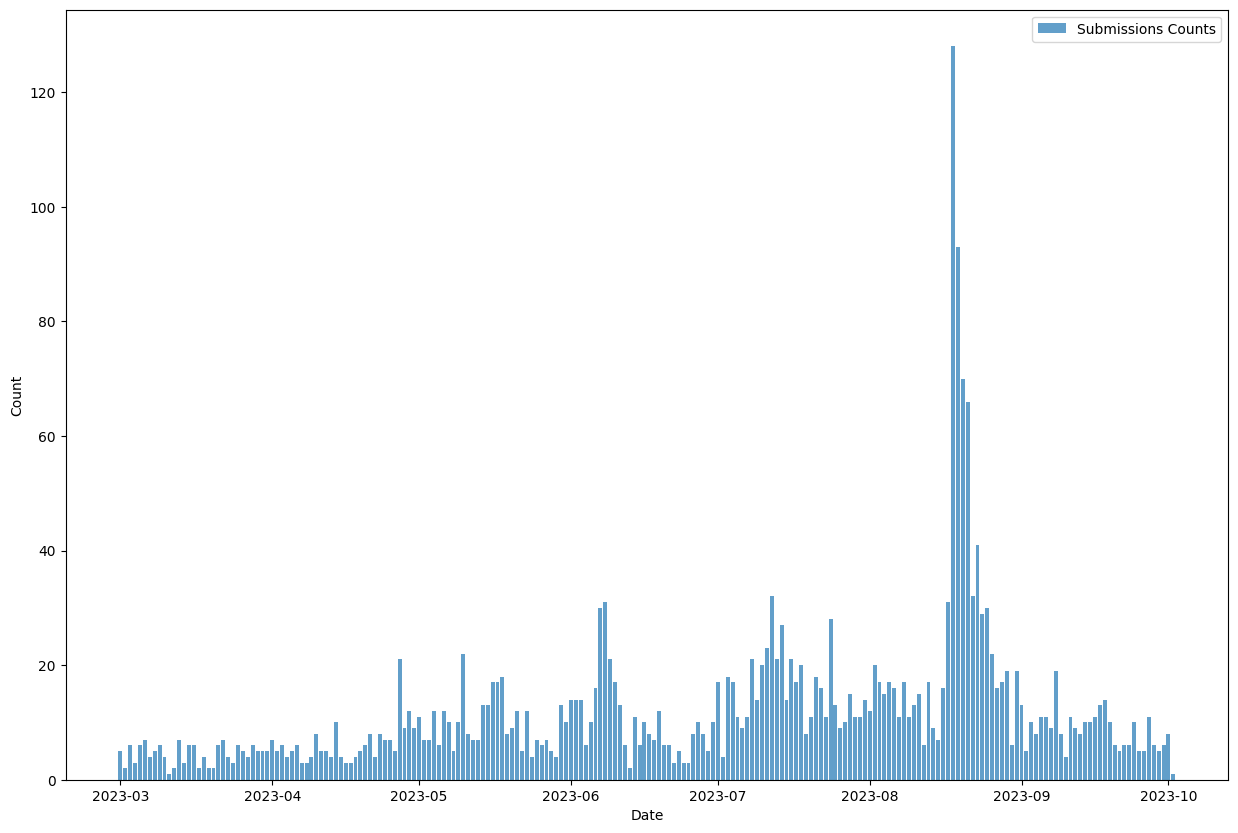

5
Downton Lake wildfire Area Restriction extended


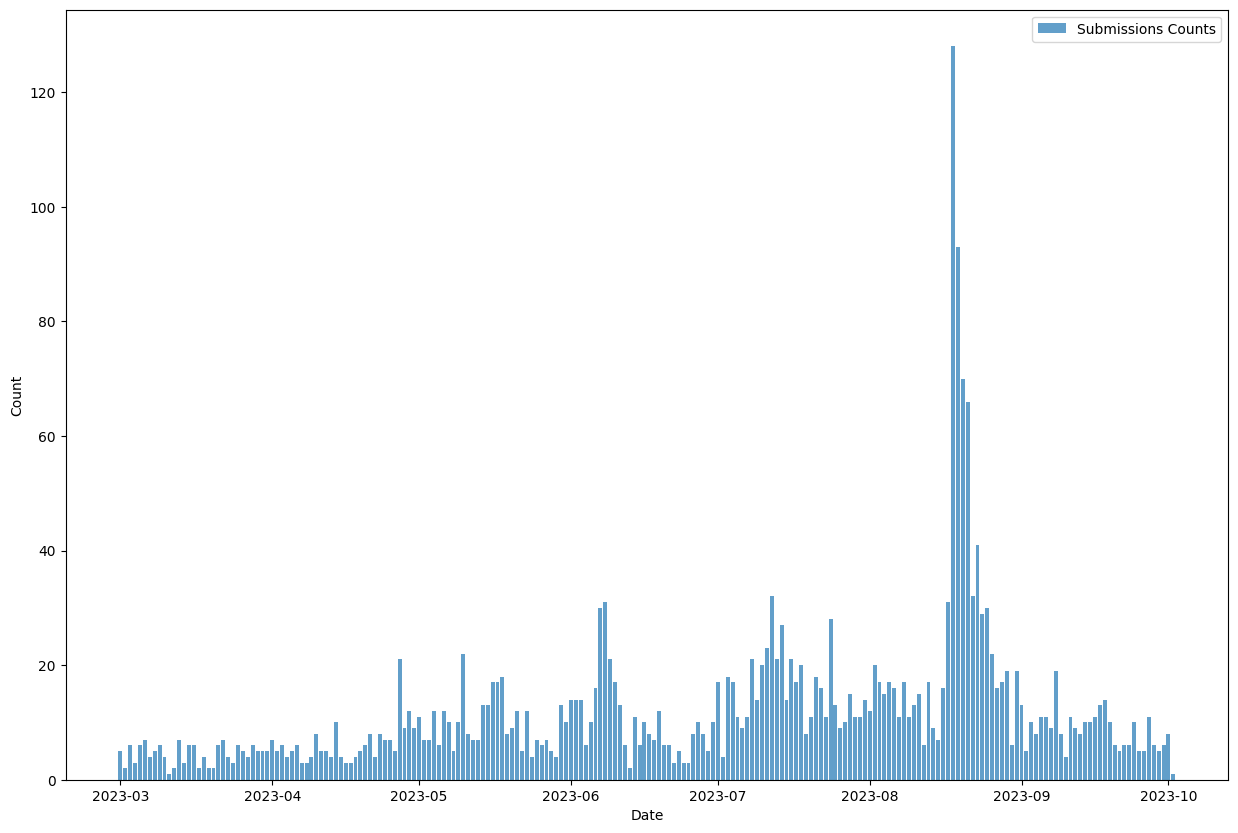

6
Campfire prohibition planned for the Northwest Fire Centre


In [11]:
for i in range(min(news_df['title_cluster']), max(news_df['title_cluster']) + 1):
    news_temp = news_df[news_df['title_cluster'] == i]
    news_daily_counts = news_temp.groupby(news_temp['time'].dt.date).size()
    news_daily_counts_max = news_daily_counts.max()
    news_daily_counts_min = news_daily_counts.min()
    if news_daily_counts_max != news_daily_counts_min:
        normalized_news_daily_counts = (news_daily_counts - news_daily_counts_min) / (news_daily_counts_max - news_daily_counts_min)
    else:
        normalized_news_daily_counts = news_daily_counts

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(15, 10))

    # ax.bar(normalized_news_daily_counts.index, normalized_news_daily_counts, label='News Counts', alpha=0.7)
    ax.bar(normalized_reddit_daily_counts.index, normalized_reddit_daily_counts, label='Submissions Counts', alpha=0.7)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.legend()

    plt.show()
    print(i)
    print(news_temp['title'].iloc[0])

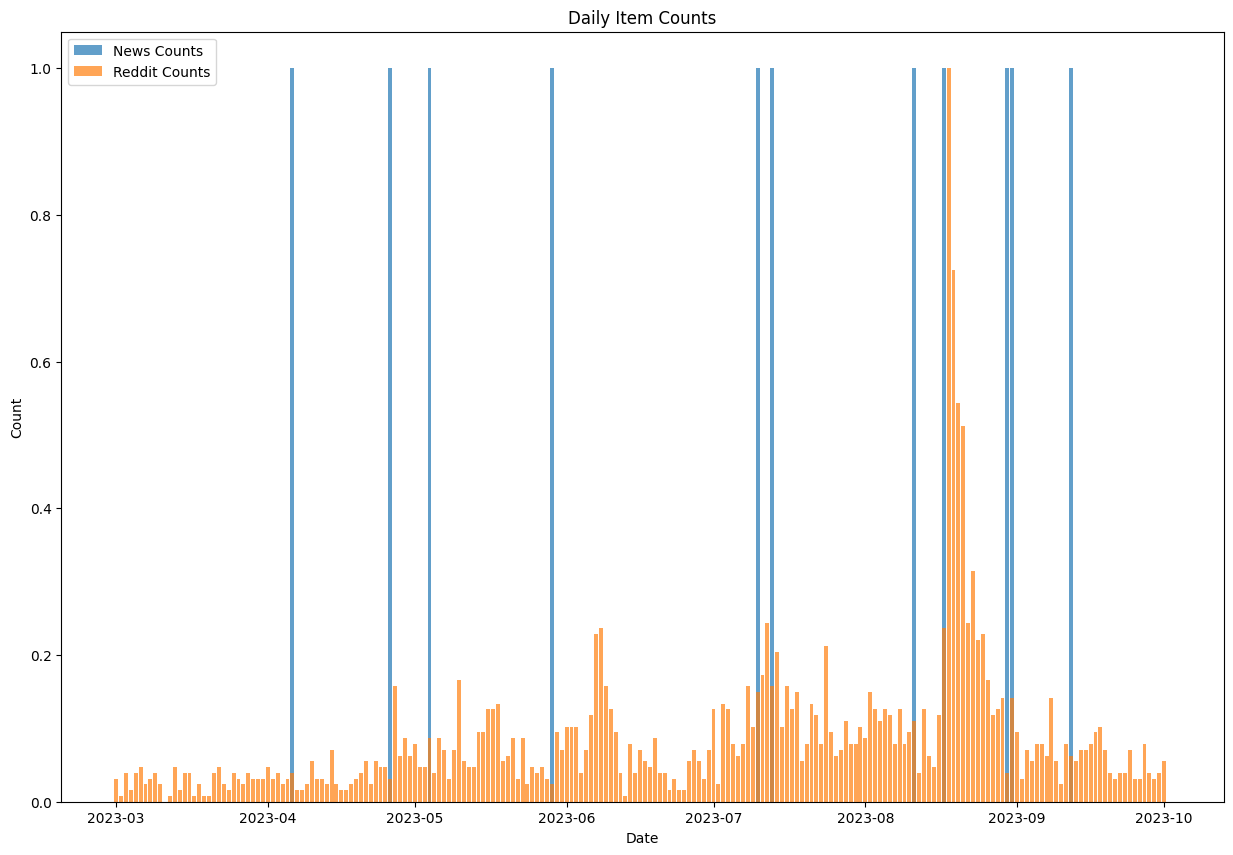

0
SMITHERS – Effective at 12:00 p.m. (noon) on Tuesday, September 12, 2023, the Category 1 campfire prohibition was rescinded in the Cassiar Fire Zone, Skeena Fire Zone and Bulkley Fire Zone. Category 1 campfires are still prohibited in the Nadina Fire Zone. Category 2 and Category 3 open burning remain prohibited across the entire Northwest Fire Centre, in addition to the use of:

fireworks, including firecrackers, and
sky lanterns.


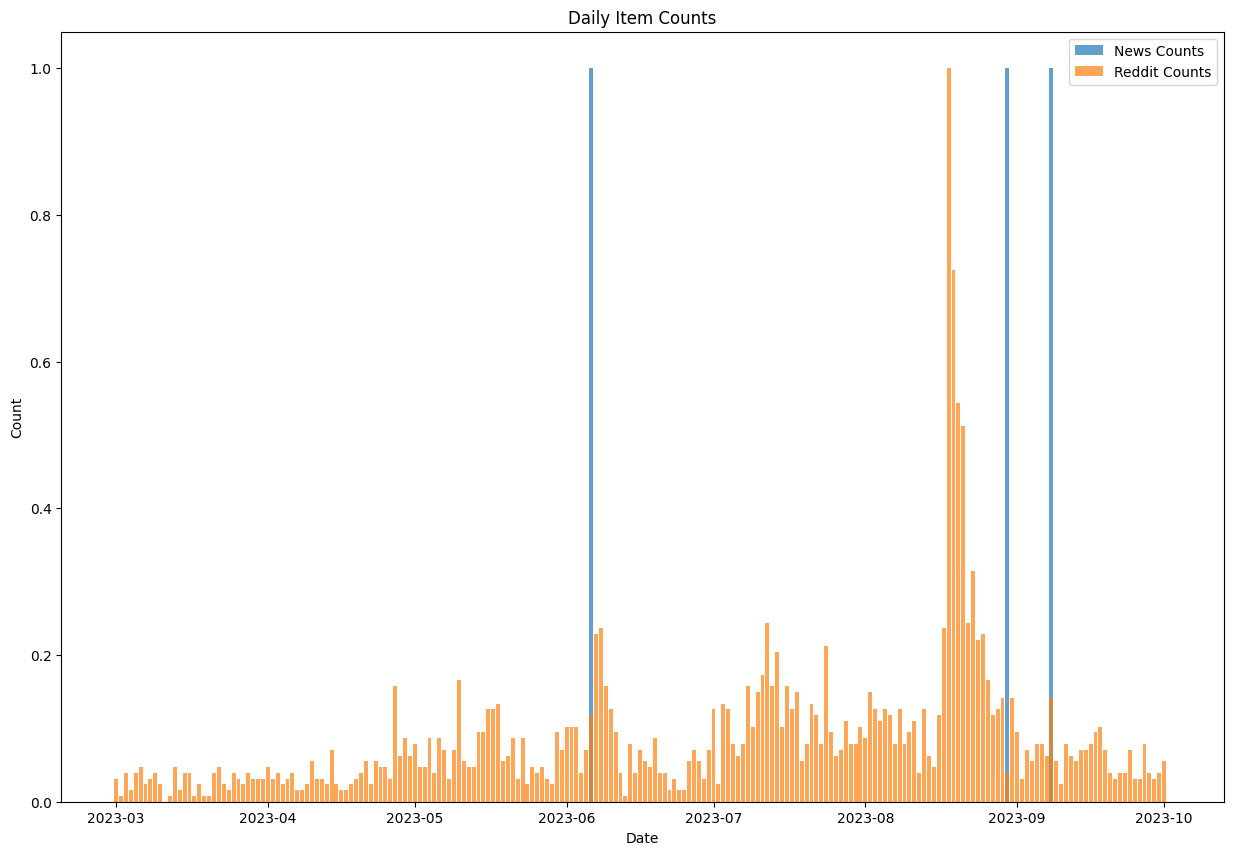

1
KAMLOOPS – The BC Wildfire Service has implemented an Area Restriction Order in the vicinity of Casper Creek wildfire (K71535), which originated approximately 24 kilometres west of Lillooet on the north side of Seton and Anderson lakes. At a bearing of 82.81°, travel 3.99 km to the junction of the southern natural shoreline of Carpenter Lake and unnamed tributary (Point #4: 50° 45.78′, -122° 16.94′). Then travel 0.39 km at a bearing of 137.2° to Point #7 (50° 51.51′, -122° 10.87′) located at the end of Camoo Road Permit Road. Interference in these areas has a direct impact on operations and poses a safety risk to both the individual and to BC Wildfire Service personnel.


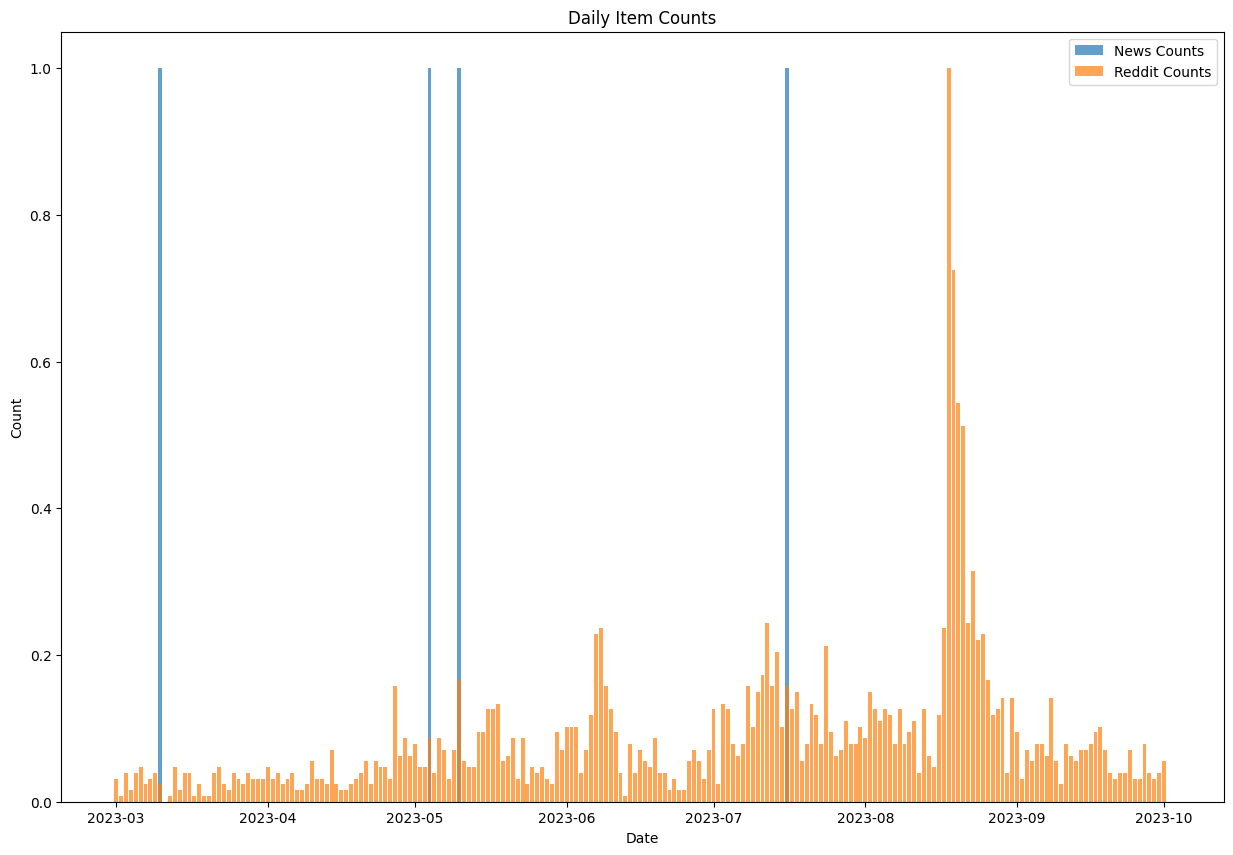

2
PRINCE GEORGE – Weather conditions across the Prince George Fire Centre continue to be warm, dry and sunny accompanied by moderate winds in all zones. Throughout Monday, zones east of the Rockies will see a significant increase in wind speeds with strong gusts possible, while winds in the zones west of the Rockies ease up slightly. Conditions on Thursday see a return of warming and drying for the Fire Centre.


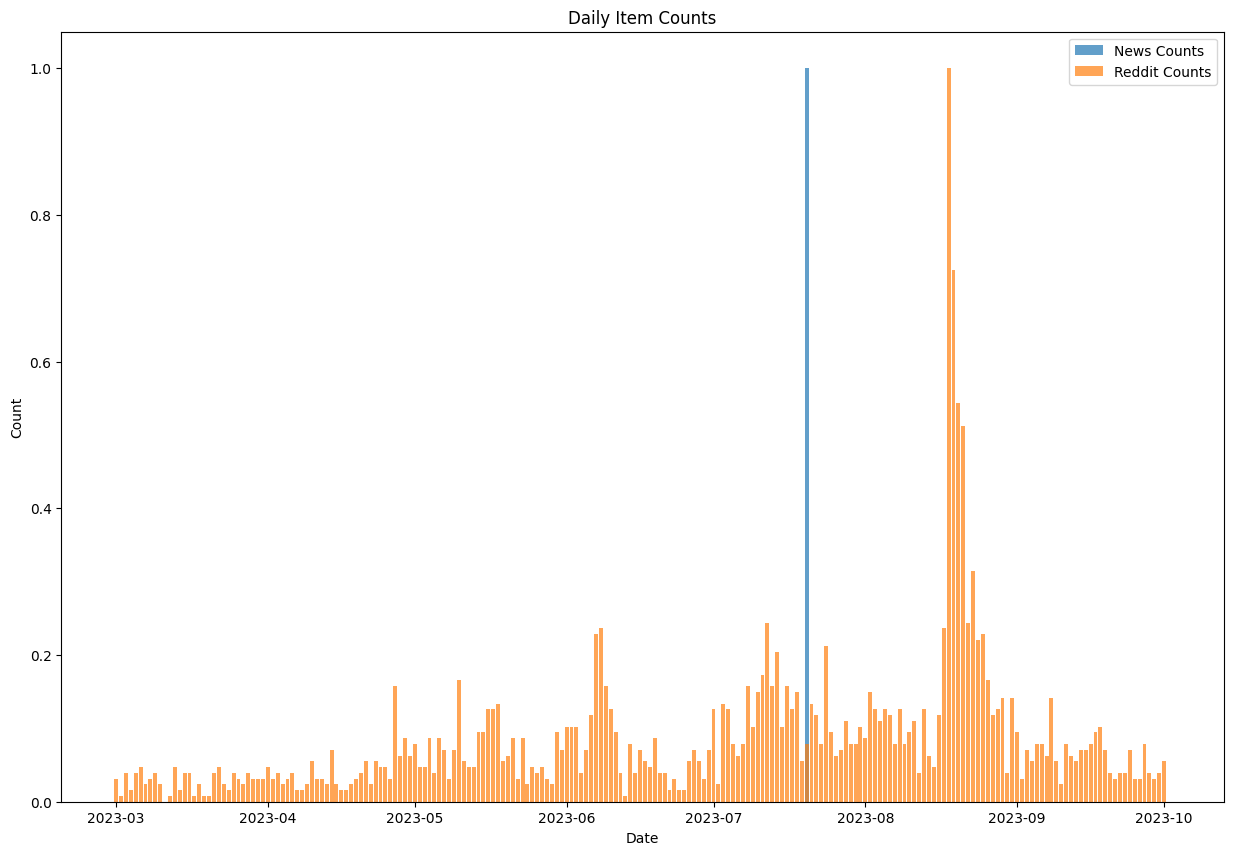

3
PARKSVILLE– The BC Wildfire Service has implemented an Area Restriction Order within the vicinity of the Kookipi Creek wildfire (V11337), located near Kookipi Creek. This area restriction reflects the need to protect public and BC Wildfire Service personnel safety in areas where fire suppression activities are taking place. East Boundary: Commencing at Point 2, travel south along the west shore of the Fraser River to Point 3 (49° 57.192’, -121° 29.004’), at the northwest corner boundary of the SPEYUM 3 Indian Reserve, excluding the STLAKAMENT 9 Indian Reserve and CHUKCHEETSO 7 Indian Reserve.


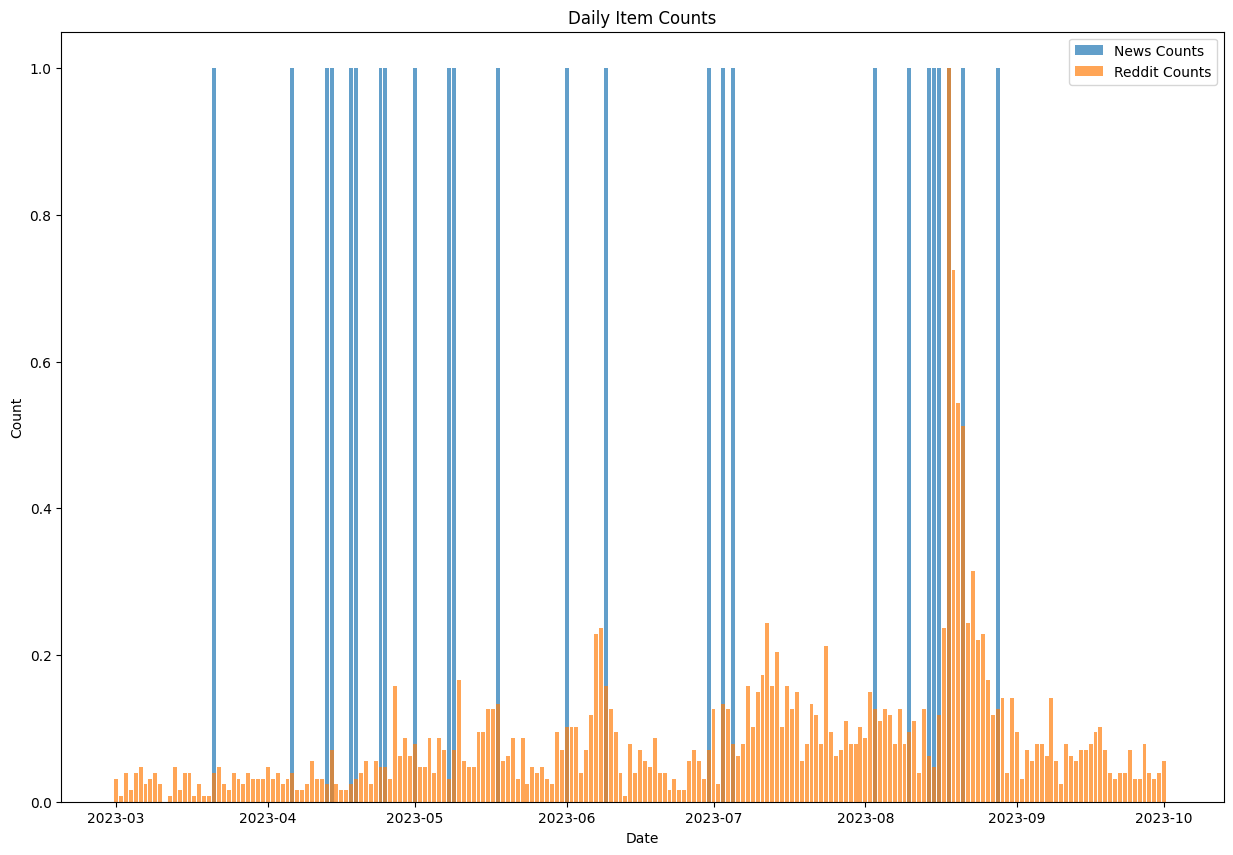

4
Since April 1, 2023, 1,944 wildfires have burned over 1.8 million hectares of land in B.C.
There are currently 373 active fires burning across the province. Existing wildfires in the north exhibited increased fire activity over the weekend. As a result, evacuation alerts were issued by the Northern Rockies Regional Municipality.


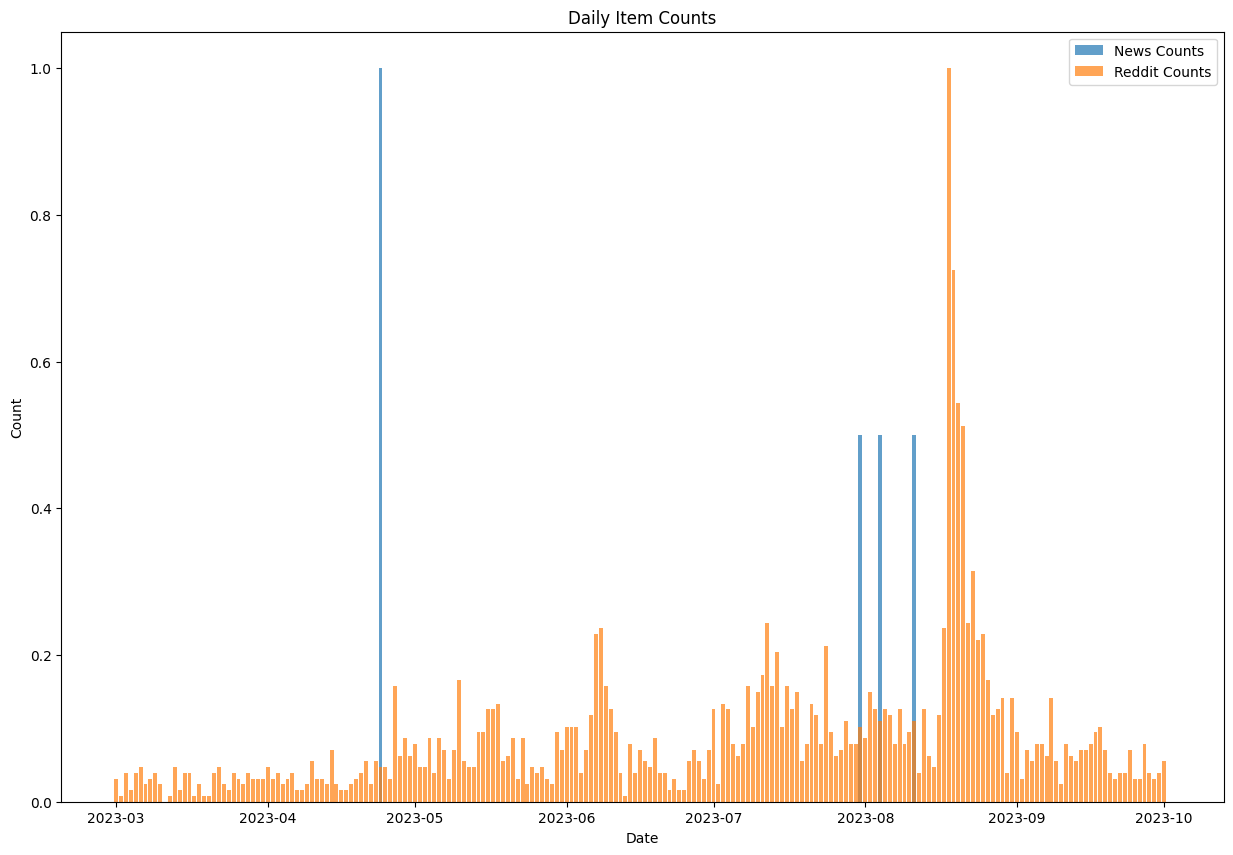

5
Since April 1, 2023, 2,097 wildfires have burned over 2.25 million hectares of land in B.C.
There are currently 411 active wildfires burning across the province. Warm temperatures will increase wildfire behaviour slightly over the weekend, and some incidents that have appeared dormant over the past week may exhibit smoke and flames, particularly in the Southern Interior and the southern portion of the Coastal Fire Centre. B.C.
continues to gratefully receive support from Mexico, South Africa, Australia, Ontario, Newfoundland, New Brunswick, Nova Scotia, Prince Edward Island, Manitoba and the Yukon.


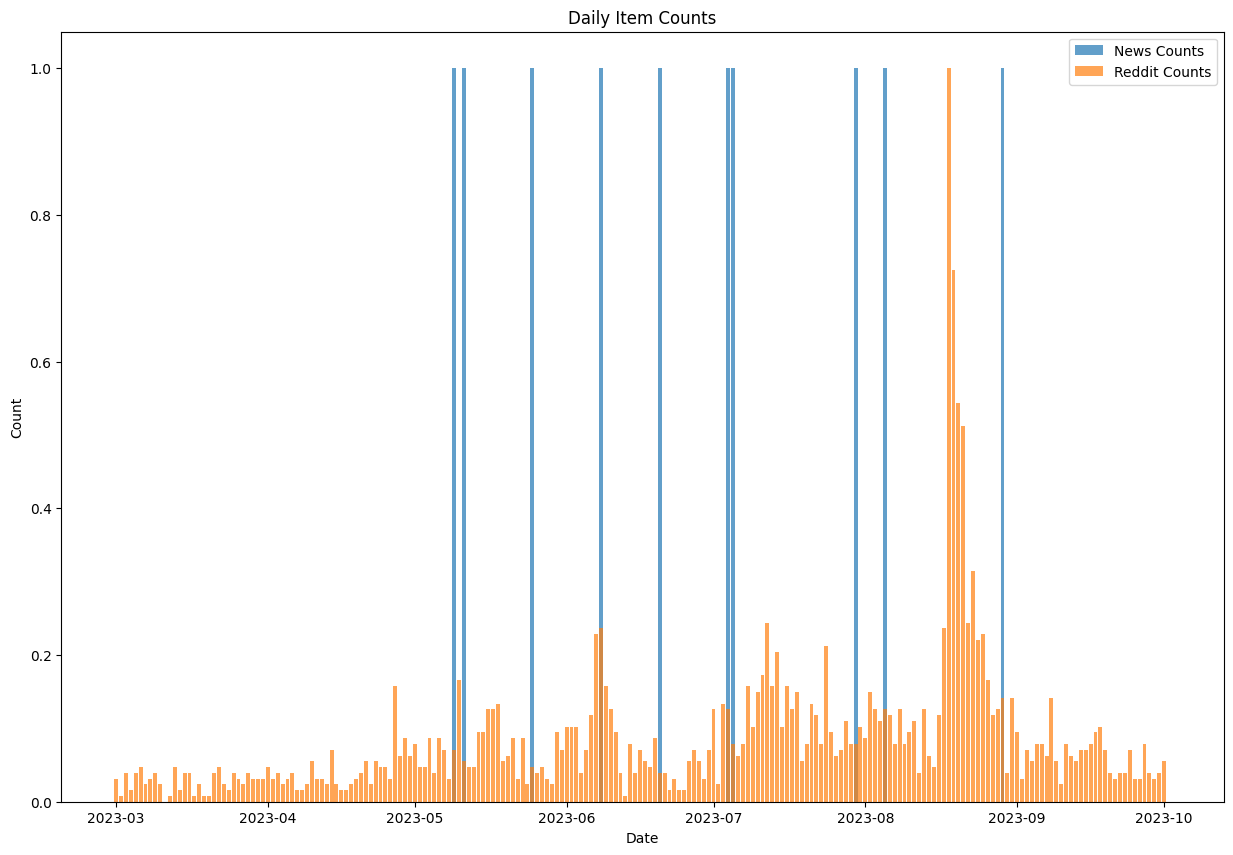

6
SMITHERS – The BC Wildfire Service is extending the end date of an Area Restriction Order within the Nadina Fire Zone for Peacock Creek fire R21178. The size of the area restriction reflects the continued need to protect the public and first responders in areas where there are ongoing fire suppression activities. North Boundary

West along the East Peacock Connector from Point F to Point G (54° 21.749′, -126° 47.259′) at the junction of Morice FSR and Peacock East Branch 5 (road permit ID 9951-05). Southeast from Point I to Point J (54° 17.776′, -126° 46.632′) at 159.55 degrees for 1.83 km.


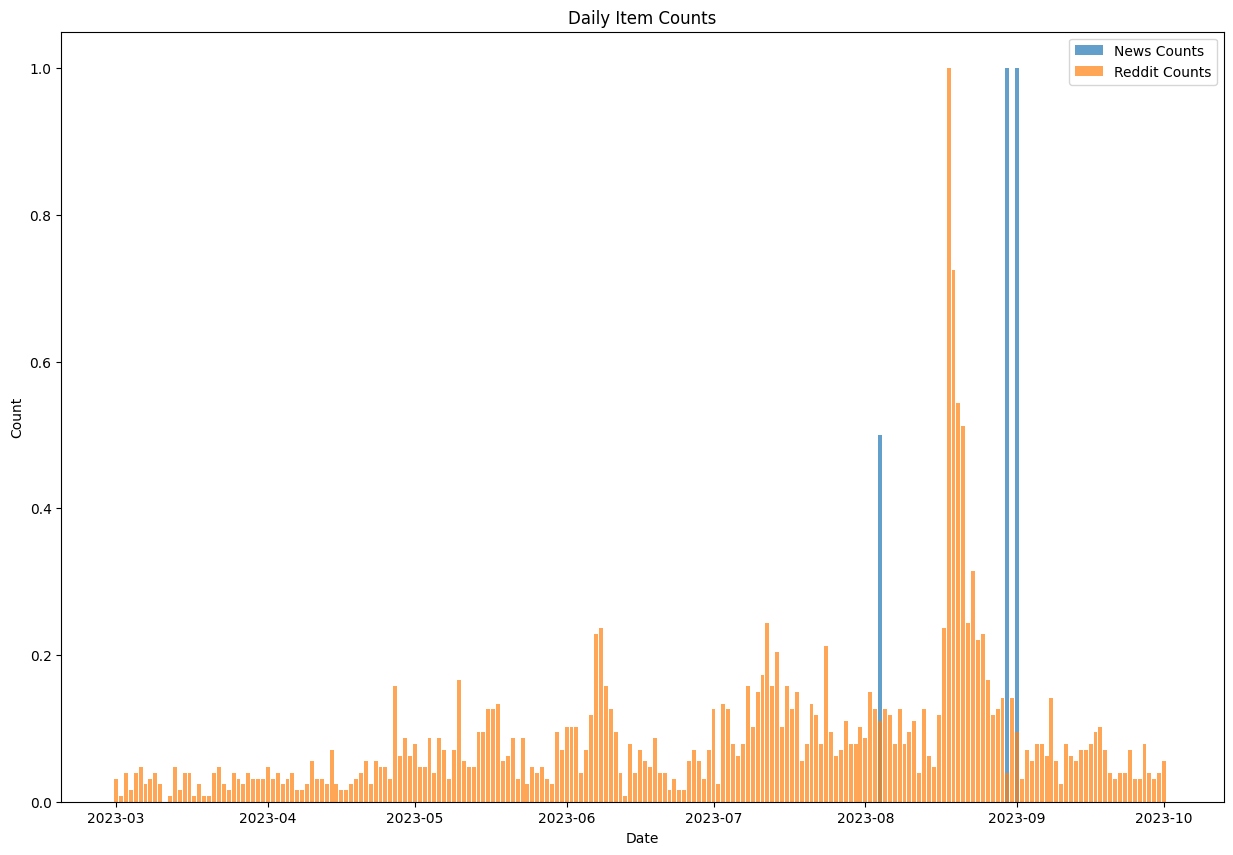

7
CASTLEGAR– Effective immediately the Area Restriction that was established around the Jubilee Mountain wildfire (N22370), which originated approximately 19 kilometres southeast of Parson, B.C, will be rescinded. The BC Wildfire Service reminds members of the public that the Jubilee Mountain wildfire is an active worksite, and they should always exercise caution while travelling in the area. Ash pits can be hard to detect and can remain hot long after the flames have died down.


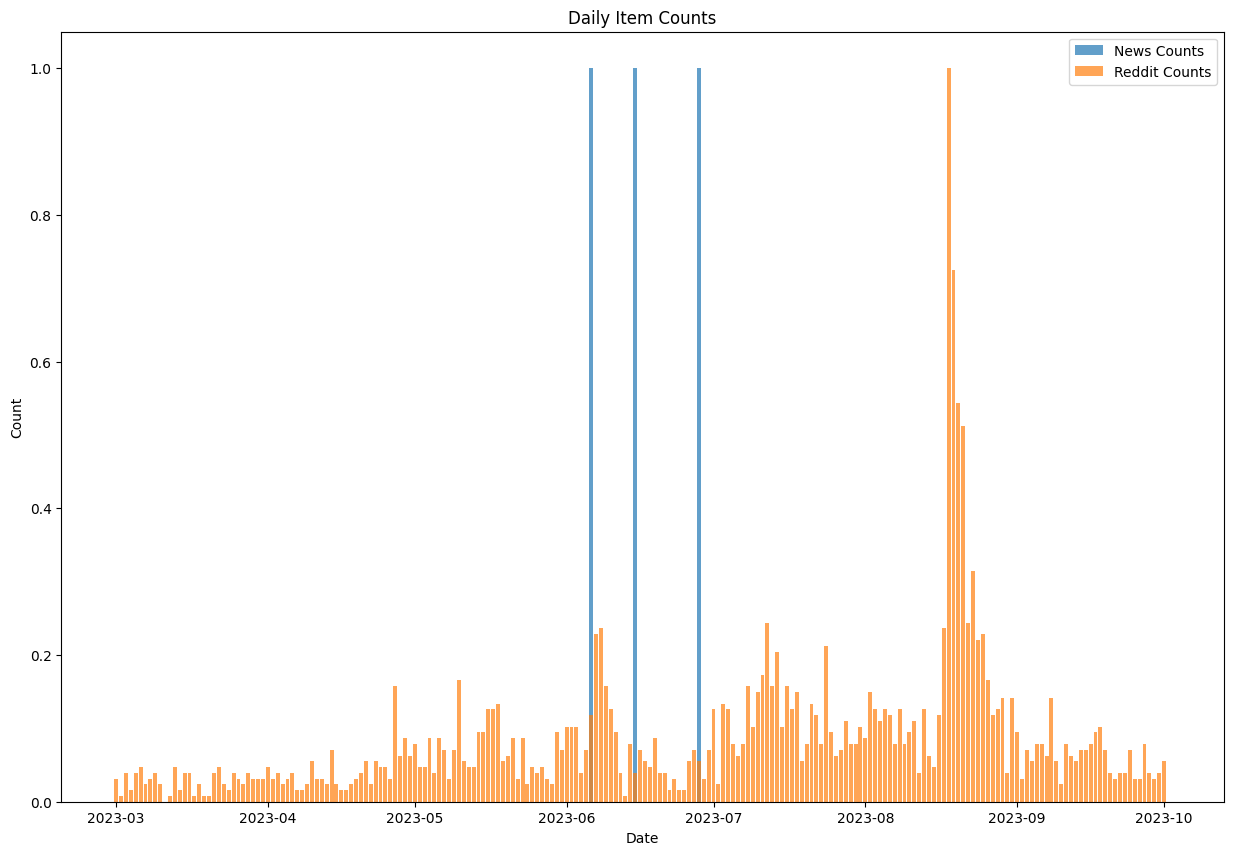

8
KAMLOOPS – The BC Wildfire Service has extended the Area Restriction Order within the vicinity of the Rossmoore Lake wildfire (K22024), located approximately 10 kilometres south of Kamloops. This area restriction reflects the need to protect public and BC Wildfire Service personnel safety in areas where fire suppression activities are taking place. From Coordinate 9, proceed east at a bearing of 358 ° for approximately 1669 metres to the most southeast corner of Lac Le Jeune Provincial Park boundary at Coordinate 10(50° 28.324′, -120° 27.565′). Continue along Goose Lake Road to where it intersects the TransMountain pipeline right of way at Coordinate 15 (50° 34.459′, -120° 23.785′), then proceed at a bearing of 3.44.3 ° for 3417 metres to the intersection of Edith Lake Road and Anderson Creek (Coordinate 16: 50° 33.822′, -120° 21.069′). Interference in these areas has a direct impact on operations and poses a safety risk to both the individual and to BC Wildfire Service personnel.


In [94]:
for i in range(min(news_df['summary_cluster']), max(news_df['summary_cluster']) + 1):
    news_temp = news_df[news_df['summary_cluster'] == i]
    news_daily_counts = news_temp.groupby(news_temp['time'].dt.date).size()
    news_daily_counts_max = news_daily_counts.max()
    news_daily_counts_min = news_daily_counts.min()
    if news_daily_counts_max != news_daily_counts_min:
        normalized_news_daily_counts = (news_daily_counts - news_daily_counts_min) / (news_daily_counts_max - news_daily_counts_min)
    else:
        normalized_news_daily_counts = news_daily_counts

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.bar(normalized_news_daily_counts.index, normalized_news_daily_counts, label='News Counts', alpha=0.7)
    ax.bar(normalized_reddit_daily_counts.index, normalized_reddit_daily_counts, label='Reddit Counts', alpha=0.7)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.set_title('Daily Item Counts')
    ax.legend()

    plt.show()
    print(i)
    print(news_temp['summary'].iloc[0])